In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Series

The Fourier series is a way to represent a periodic function as a sum of sines and cosines.  The general form of the Fourier series is:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n\omega t) + b_n \sin(n\omega t)
\end{equation}

where $\omega = 2\pi/T$ and $T$ is the period of the function.  The coefficients $a_n$ and $b_n$ are given by:

\begin{equation}
a_n = \frac{2}{T} \int_{t_0}^{t_0+T} f(t) \cos(n\omega t) dt
\end{equation}

\begin{equation}
b_n = \frac{2}{T} \int_{t_0}^{t_0+T} f(t) \sin(n\omega t) dt
\end{equation}

## Nyquist Frequency

The Nyquist frequency is the highest frequency that can be represented in a Fourier series.  It is given by:

\begin{equation}
f_{\rm Nyquist} = \frac{1}{2\Delta t}
\end{equation}

where $\Delta t$ is the time step between samples.  The Nyquist frequency is the highest frequency that can be represented in the Fourier series.

# Discrete Time Series

In practice, we often have a discrete time series.  We can represent the Fourier series in terms of a discrete time series as:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{N} a_n \cos(n\omega t) + b_n \sin(n\omega t)
\end{equation}

where $N$ is the number of terms in the Fourier series.  The coefficients $a_n$ and $b_n$ are given by:

\begin{equation}
a_n = \frac{2}{N} \sum_{k=0}^{N-1} f_k \cos(n\omega t_k)
\end{equation}

\begin{equation}
b_n = \frac{2}{N} \sum_{k=0}^{N-1} f_k \sin(n\omega t_k)
\end{equation}

where $t_k$ are the discrete time values and $f_k$ are the discrete function values.

### Calculation of Maximum Number of Terms

Suppose that we have a discrete time series with $N_{pts}$ points between $t_{\rm low}$ and $t_{\rm high}$. 

The time step is given by:

\begin{equation}
\Delta t = \frac{t_{\rm high}-t_{\rm low}}{N_{pts}}
\end{equation}

The Nyquist frequency is given by:

\begin{equation}
f_{\rm Nyquist} = \frac{1}{2\Delta t}
\end{equation}

The terms in the Fourier series look like $\cos(n\omega t)$ and $\sin(n\omega t)$.  The frequency $\omega$ is given by:

\begin{equation}
\omega = \frac{2\pi}{T}
\end{equation}

where $T$ is the period of the function.  The frequency $f_n$ is given by:

\begin{equation}
f_n = n \frac{\omega}{2\pi} = \frac{n}{T}
\end{equation}

The Nyquist frequency corresponds to the highest meaningful frequency component.  Thus, we can calculate the maximum number of terms in the Fourier series as:

\begin{equation}
N = n_{\rm max} = T f_{\rm Nyquist}
\end{equation}

Since we do not know, a priori, the period of the function, we can use the maximum time over which we sample the function as the period.  Thus, the maximum number of terms in the Fourier series is given by:

\begin{equation}
N = n_{\rm max} = (t_{\rm high}-t_{\rm low}) f_{\rm Nyquist}
\end{equation}

One should emphasize the difference here between $N$, the maximum number of terms in the Fourier series, and $N_{pts}$, the number of points in the discrete time series.  The maximum number of terms in the Fourier series is determined by the Nyquist frequency and the maximum time over which we sample the function.  The number of points in the discrete time series is determined by the time step and the maximum time over which we sample the function.


In [164]:
npts = 500

# Define the start and end times
xlow = 0*np.pi
xhigh = 10.0*np.pi

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/npts

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*2*np.pi*t/P) or sin(n*2*np.pi*t/P)
#
# Thus, omega = n*2*np.pi/P = n*2*np.pi/(thigh-tlow)
#       f = omega/(2.0*np.pi) = n/(thigh-tlow)
#
#       f_nyquist = n_max/(thigh-tlow)
#
#       n_max = (thigh-tlow)*f_nyquist

nterms = int((xhigh-xlow)*f_nyquist)

print ('Max terms (from Nyquist) = ',nterms)

aliasing_factor = 2.0
nterms = 250

Nyquist frequency =  7.957747154594767
Max terms (from Nyquist) =  250


In [165]:
# We begin with a base signal frequency, f_signal = 1.0/(2.0*np.pi) = 0.15915494309189535 Hz
# We will add additional frequencies to this base signal
f_signal = 1.0/(2.0*np.pi)

# Define the angular frequency, omega
w = f_signal*2.0*np.pi

# Define the function
# f(x) = sin(w*x) + 0.8*sin(2.0*w*x) + 0.6*sin(3.0*w*x) + 0.4*sin(4.0*w*x)
#
# So, we will have FOUR frequencies in the signal
#
fx = []
for i in range(len(x)):
    fx.append(1.0*np.sin(w*x[i]) + 0.8*np.sin(2.0*w*x[i]) + 0.6*np.sin(3.0*w*x[i]) + 0.4*np.sin(4.0*x[i]))
    #fx.append(1.0*np.sin(w*x[i]))
    

Text(0, 0.5, 'f(t)')

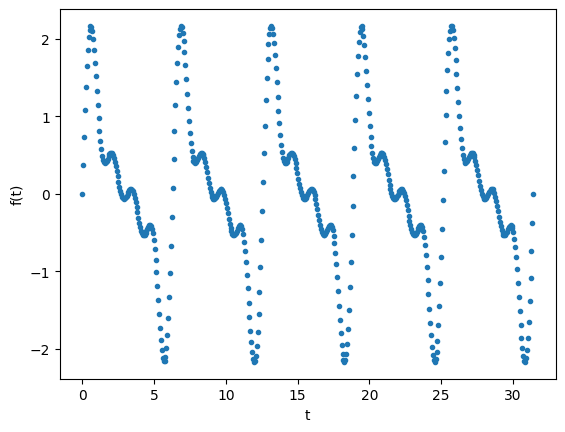

In [166]:
plt.plot(x,fx,'.')
plt.xlabel('t')
plt.ylabel('f(t)')


In [172]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    T = (xhigh-xlow)
    n.append(i)
    fn.append(i/T)

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + aliasing_factor/T*fx[k]*dt
        ansum = ansum + aliasing_factor/T*fx[k]*np.cos(2*i*np.pi*x2[k]/T)*dt
        bnsum = bnsum + aliasing_factor/T*fx[k]*np.sin(2*i*np.pi*x2[k]/T)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*2*np.pi*x2[j]/T)+bn[i]*np.sin(i*2*np.pi*x2[j]/T)        

Data: n = 1.0000, a_n = 0.0000, bn = 0.0000
Data: n = 2.0000, a_n = -0.0000, bn = -0.0000
Data: n = 3.0000, a_n = -0.0000, bn = -0.0000
Data: n = 4.0000, a_n = -0.0000, bn = -0.0000
Data: n = 5.0000, a_n = -0.0000, bn = 0.9980
Data: n = 6.0000, a_n = -0.0000, bn = -0.0000
Data: n = 7.0000, a_n = -0.0000, bn = -0.0000
Data: n = 8.0000, a_n = -0.0000, bn = 0.0000
Data: n = 9.0000, a_n = 0.0000, bn = 0.0000
Data: n = 10.0000, a_n = 0.0000, bn = 0.7984


Text(0, 0.5, 'f(t)')

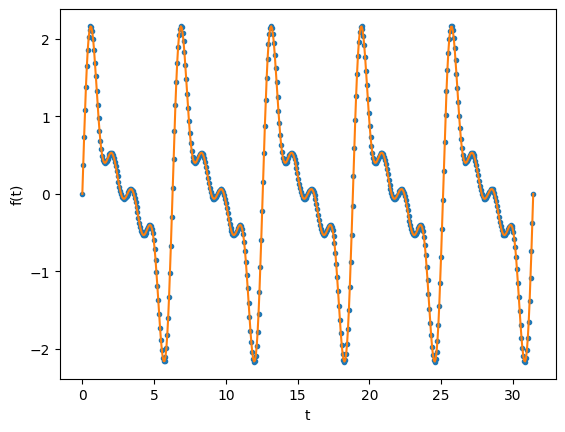

In [173]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)
plt.xlabel('t')
plt.ylabel('f(t)')

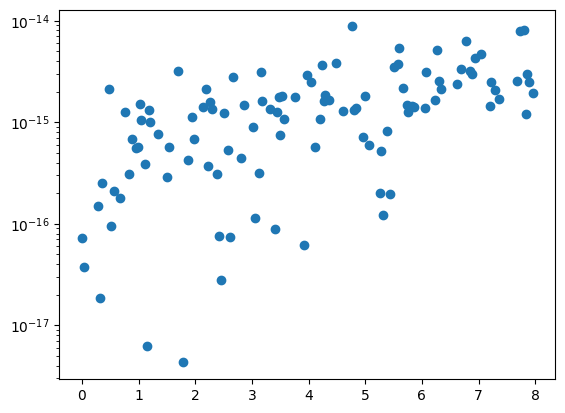

In [174]:
plt.plot(fn,an,'o')
plt.yscale("log")

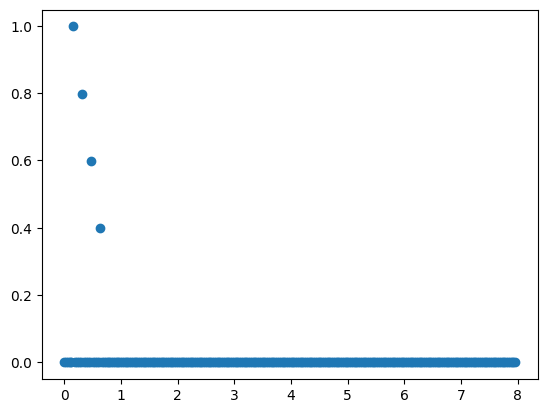

In [175]:
plt.plot(fn,bn,'o')

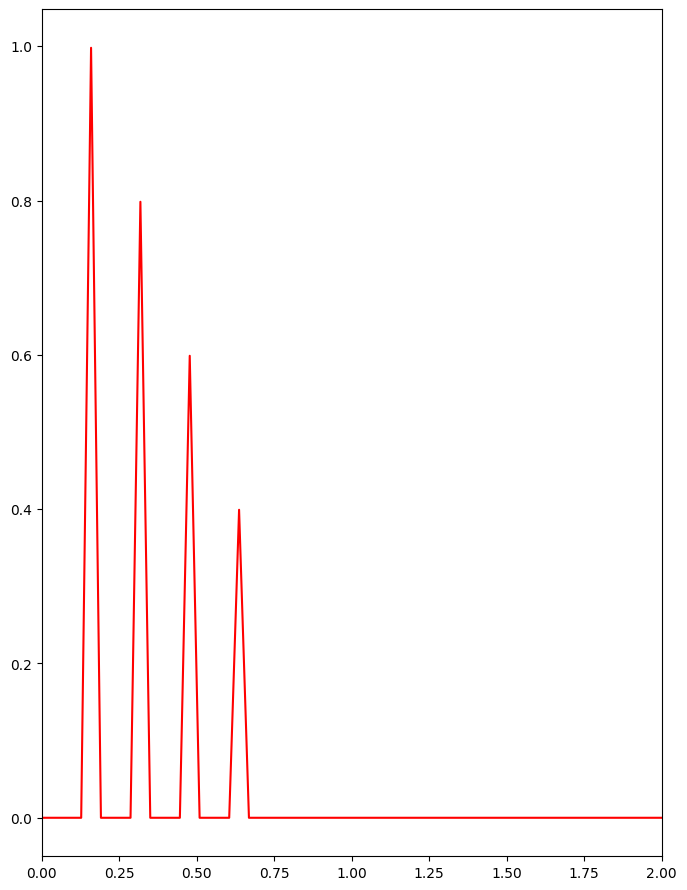

In [176]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_xlim(0.0,2)

# Plot vertical lines at the base frequency and its harmonics
plot_f_signal = False
if (plot_f_signal):
    axs2.axvline(x=1.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=2.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=3.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=4.0*f_signal, color='k', linestyle='--')

# Conclusions

The highest frequency in the Fourier series is the Nyquist frequency. The Nyquist frequency is defined by the time-spacing between the samples in the time series, which is in turn given by the sampling frequency of the time series.

The lowest frequency in the Fourier series is determined by the length of the time series.  The lowest frequency is given by the inverse of the length of the time series.

So, these are the "knobs" that we can turn to adjust the frequency range of the Fourier series.

However, if we only include terms up to the Nyquist frequency, we will not be able to accurately represent the function.  We need to include terms up to double the Nyquist frequency than the Nyquist frequency to accurately represent the function.

To account for this, we include an "aliasing factor" (of 2) in the calculation of the Fourier coefficients.


# Example:  COVID-19 Data

In [74]:
import pandas as pd
import os
os.chdir("/Users/brash/phys340/JupyterNotebooks/Fourier_Series/")
df = pd.read_csv('US.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  16020 non-null  object 
 1   state            16020 non-null  object 
 2   tot_cases        16020 non-null  int64  
 3   conf_cases       5566 non-null   float64
 4   prob_cases       5566 non-null   float64
 5   new_case         16020 non-null  int64  
 6   pnew_case        10756 non-null  float64
 7   tot_death        16020 non-null  int64  
 8   conf_death       5923 non-null   float64
 9   prob_death       5923 non-null   float64
 10  new_death        16020 non-null  int64  
 11  pnew_death       10754 non-null  float64
 12  created_at       16020 non-null  object 
 13  consent_cases    13083 non-null  object 
 14  consent_deaths   13350 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 1.8+ MB


In [76]:
df['date'] = pd.to_datetime(df['submission_date'])    
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  16020 non-null  object        
 1   state            16020 non-null  object        
 2   tot_cases        16020 non-null  int64         
 3   conf_cases       5566 non-null   float64       
 4   prob_cases       5566 non-null   float64       
 5   new_case         16020 non-null  int64         
 6   pnew_case        10756 non-null  float64       
 7   tot_death        16020 non-null  int64         
 8   conf_death       5923 non-null   float64       
 9   prob_death       5923 non-null   float64       
 10  new_death        16020 non-null  int64         
 11  pnew_death       10754 non-null  float64       
 12  created_at       16020 non-null  object        
 13  consent_cases    13083 non-null  object        
 14  consent_deaths   13350 non-null  objec

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_6300/3371631905.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['submission_date'])


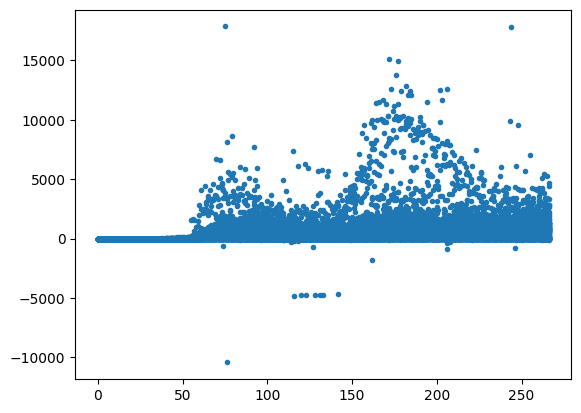

In [77]:
plt.plot(df['date_delta'],df['new_case'],'.')

266


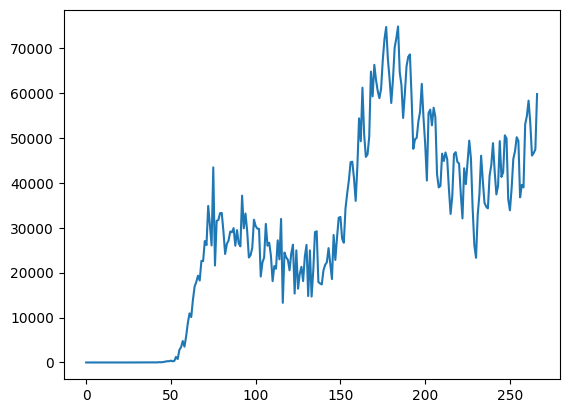

In [78]:
daymax = int(df['date_delta'].values.max())
print (daymax)

newsumbyday = [0 for i in range(0,daymax+1)]
day = [i for i in range(0,daymax+1)]

for i in range(len(df)):
    current_day = int(df['date_delta'].values[i])
    newsumbyday[current_day] += df['new_case'].values[i]
    
plt.plot(day,newsumbyday,'-')

In [79]:
tmin = np.min(day)
tmax = np.max(day)
tbar = (tmax-tmin)/2.0

day=day-tbar

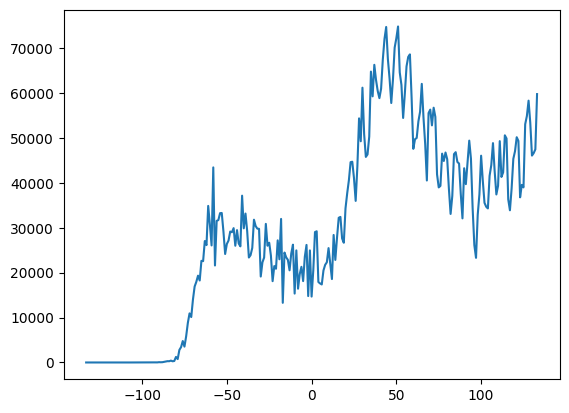

In [80]:
plt.plot(day,newsumbyday,'-')
fx = newsumbyday

In [85]:
npts = len(day)
xlow = np.min(day)
xhigh = np.max(day)

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/(npts-1)

print (xlow,xhigh,dt)

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/(xhigh-xlow)
#       f = omega/(2.0*np.pi) = n/(2.0*(xhigh-xlow))
#
#       f_nyquist = n_max/(2.0*(xhigh-xlow))
#
#       n_max = 2.0*(xhigh-xlow)*f_nyquist

nterms = int(2.0*(xhigh-xlow)*f_nyquist)

print ('Max terms = ',nterms)

nterms = int(133)

-133.0 133.0 1.0
Nyquist frequency =  0.5
Max terms =  266


In [86]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    P = xhigh
    n.append(i)
    fn.append(i/(2.0*P))

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*np.pi*x2[k]/P)*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*np.pi*x2[k]/P)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*np.pi*x2[j]/P)+bn[i]*np.sin(i*np.pi*x2[j]/P)     

Data: n = 1.0000, a_n = 6727.3118, bn = 21542.1474
Data: n = 2.0000, a_n = -6914.4776, bn = -5396.9325
Data: n = 3.0000, a_n = -10619.6303, bn = 4618.4223
Data: n = 4.0000, a_n = -228.1728, bn = -4653.1868
Data: n = 5.0000, a_n = 1316.1034, bn = 1359.7774
Data: n = 6.0000, a_n = 630.4871, bn = -4317.0608
Data: n = 7.0000, a_n = -695.1708, bn = 2827.1891
Data: n = 8.0000, a_n = 632.1025, bn = -1224.8353
Data: n = 9.0000, a_n = 137.8234, bn = 1041.5061
Data: n = 10.0000, a_n = 337.2742, bn = -2181.3652


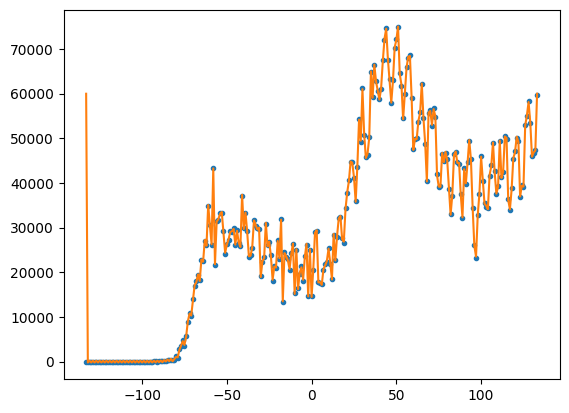

In [87]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)

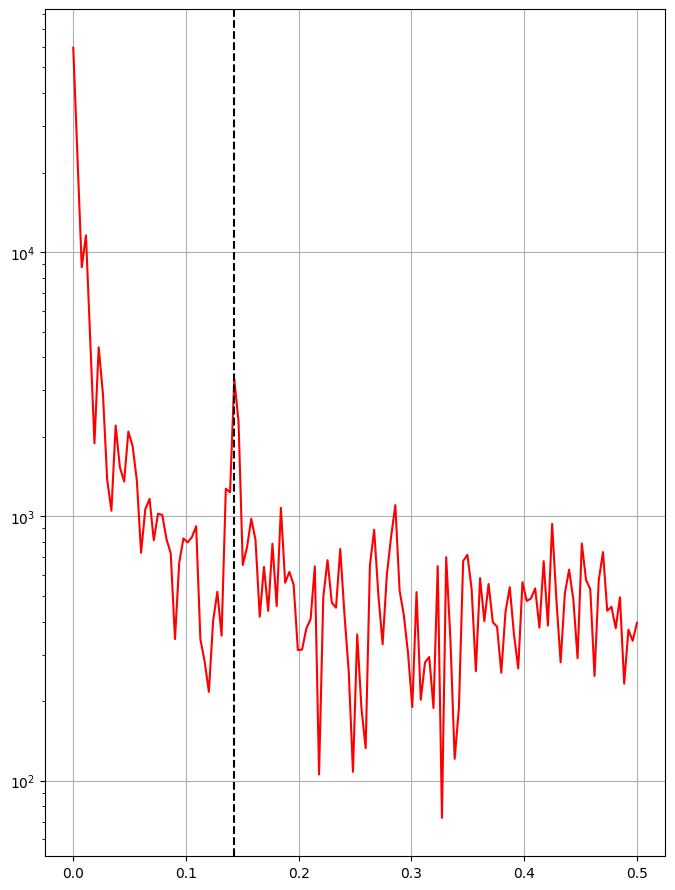

In [88]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_yscale('log')

# turn on grid
axs2.grid(True)

once_per_week = 1.0/7.0

# Draw a vertical line at the once per week frequency
axs2.axvline(x=once_per_week, color='k', linestyle='--')